In [ ]:
import pandas as pdb

In [2]:
df = pd.read_csv('../results/results.csv')

In [3]:
df

,run_name,test_loss,test_acc,test_precision,test_recall,test_f1,test_auc
0,Stability_layer11_mean,2.338866,0.500344,0.491952,0.997125,0.658848,0.679863
1,Stability_layer22_mean,2.027763,0.488075,0.485895,0.998611,0.653712,0.696105
2,Stability_layer33_mean,1.478168,0.630876,0.572829,0.932623,0.709731,0.716665
3,Stability_layer33_cls,1.760581,0.533508,0.509330,0.980394,0.670385,0.690770
4,Activity_layer11_mean,2.455876,0.483871,0.483871,1.000000,0.652174,0.590214
5,Activity_layer22_mean,3.924319,0.483871,0.483871,1.000000,0.652174,0.540470
6,Activity_layer33_mean,3.461226,0.483871,0.483871,1.000000,0.652174,0.618664
7,Activity_layer33_cls,4.278503,0.483871,0.483871,1.000000,0.652174,0.585066
8,Binding_layer11_mean,7.140450,0.492623,0.492623,1.000000,0.660077,0.588136
9,Binding_layer22_mean,7.137596,0.492623,0.492623,1.000000,0.660077,0.575354


In [14]:
run_names = ['Stability_layer33_mean','Activity_layer33_mean', 'Binding_layer33_mean', 'Expression_layer33_mean', 'OrganismalFitness_layer33_mean', 'nonhomologous_batch_Activity_layer33_mean', 'nonhomologous_batch_Binding_layer33_mean', 'nonhomologous_batch_Expression_layer33_mean', 'nonhomologous_batch_OrganismalFitness_layer33_mean','nonhomologous_batch_Stability_layer33_mean']
auc_df = df[df['run_name'].isin(run_names)][['run_name', 'test_auc']].sort_values('test_auc', ascending=False)
auc_df

,run_name,test_auc
23,nonhomologous_batch_Stability_layer33_mean,0.890584
24,nonhomologous_batch_Activity_layer33_mean,0.738923
2,Stability_layer33_mean,0.716665
25,nonhomologous_batch_Binding_layer33_mean,0.672694
27,nonhomologous_batch_OrganismalFitness_layer33_...,0.662706
6,Activity_layer33_mean,0.618664
14,Expression_layer33_mean,0.616564
26,nonhomologous_batch_Expression_layer33_mean,0.598456
18,OrganismalFitness_layer33_mean,0.595264
10,Binding_layer33_mean,0.556657


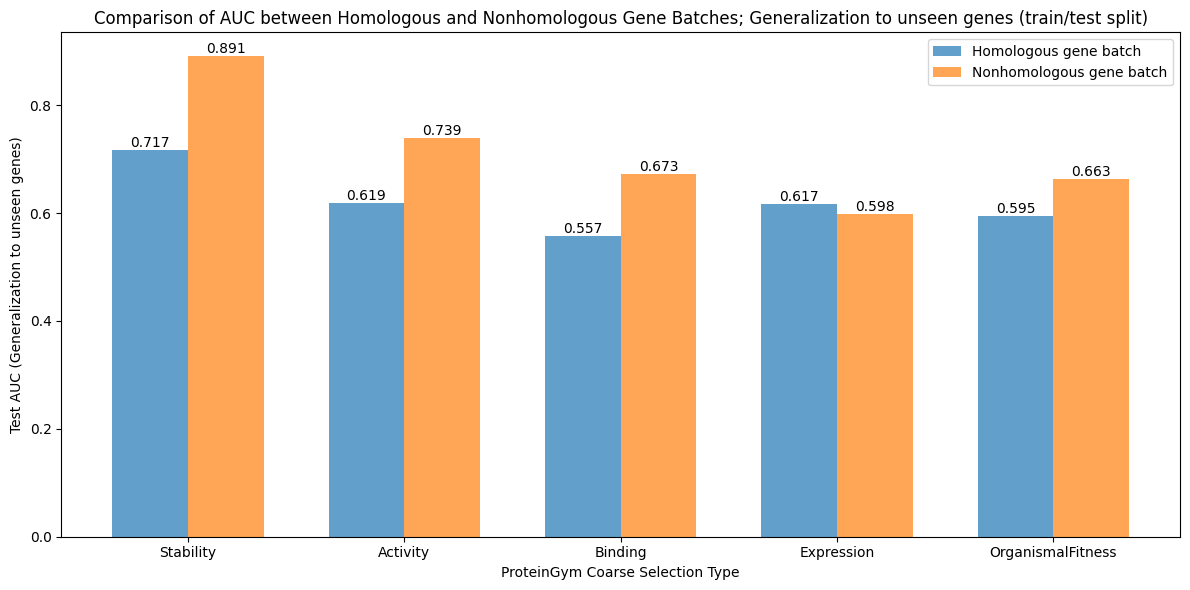

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
categories = ['Stability', 'Activity', 'Binding', 'Expression', 'OrganismalFitness']
homologous = []
nonhomologous = []

for cat in categories:
    # Get homologous (original) AUC
    hom_auc = auc_df[auc_df['run_name'].str.contains(f'^{cat}_') & 
                    ~auc_df['run_name'].str.startswith('nonhomologous')]['test_auc'].values[0]
    # Get nonhomologous batch AUC
    nonhom_auc = auc_df[auc_df['run_name'].str.contains(f'nonhomologous_batch_{cat}')]['test_auc'].values[0]
    
    homologous.append(hom_auc)
    nonhomologous.append(nonhom_auc)

# Create bar positions
x = np.arange(len(categories))
width = 0.35  # Width of the bars

# Create the plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, homologous, width, label='Homologous gene batch', alpha=0.7)
bars2 = plt.bar(x + width/2, nonhomologous, width, label='Nonhomologous gene batch', alpha=0.7)

# Add labels, title and custom x-axis tick labels
plt.xlabel('ProteinGym Coarse Selection Type')
plt.ylabel('Test AUC (Generalization to unseen genes)')
plt.title('Comparison of AUC between Homologous and Nonhomologous Gene Batches; Generalization to unseen genes (train/test split)')
plt.xticks(x, categories)
plt.legend()

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()